In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

In [11]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/decisiontree_1.csv")
encoding = {"mesin" : {"bensin" : 0, "diesel" : 1}, 
            "penggerak" : {"depan" : 0, "belakang" : 1}}
data.replace(encoding, inplace=True)

In [12]:
data.head()

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [16]:
x = data.drop(["ID", "label"], axis =1)
y = data["label"]

In [18]:
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3)

In [19]:
import sklearn.tree as tree
model = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
y_prediksi = model.predict(x_test)
y_prediksi

array(['sedan', 'sedan', 'minibus', 'sedan', 'sedan', 'sedan', 'minibus',
       'minibus', 'sedan', 'sedan'], dtype=object)

In [24]:
import sklearn.metrics as met
print (met.accuracy_score(y_test, y_prediksi))

0.9


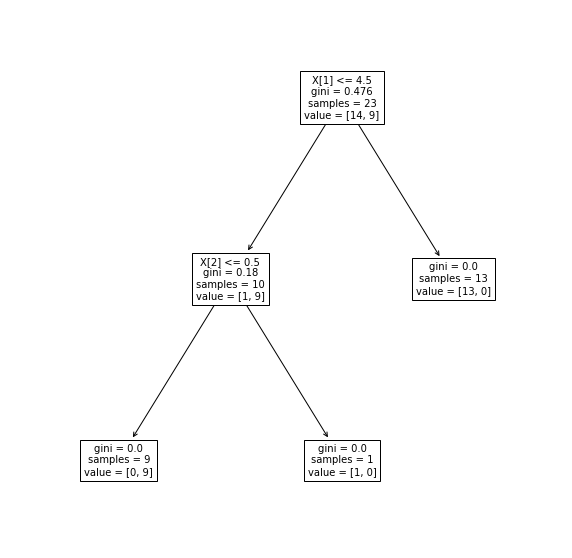

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(10,10))
tree.plot_tree(model, fontsize=10)
plt.show()